In [1]:
import glob
import copy
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image
import random

## imagesとlabelsのfull-pathをリストで取得

In [8]:
# imagesとlabelsリストの取得
data_dir = "dataset/train"
image_paths = [os.path.join(data_dir, 'images', filename) for filename in os.listdir(os.path.join(data_dir, 'images')) if filename.endswith(".jpg")]
label_paths = [os.path.join(data_dir, 'labels', filename) for filename in os.listdir(os.path.join(data_dir, 'labels')) if filename.endswith(".txt")]

In [9]:
# # imagesとlabelsリストの取得
# data_dir = "C:/Users/yuuki/Kaggle/object_detection_try/shellfish/after_data/train"

# for root, subdirs, files in os.walk(data_dir):
#     # print(root)
#     # print(subdir)
#     # print(files)
#     # print("="*100)
#     print(root)
#     for subdir in subdirs:
#         print(subdir)
    

## 訓練データの画像にbboxを描きこむ

In [10]:
# 描画した画像の保存先
os.makedirs("./train_draw", exist_ok=True)

In [11]:
# 描画した画像の保存先を変数に格納
dir = "./train_draw/"

In [12]:
# 全ての訓練画像にbboxを描画
for image_path, label_path in list(zip(image_paths, label_paths)):
    filename = os.path.basename(image_path)
    # 画像の読み込み
    img = cv2.imread(image_path)
    # bboxを描画したら画像が変わるためコピーをする
    img_draw = img.copy()
    # 高さと幅を取得
    h, w = img.shape[:2]
    # bboxの読み込み
    with open(label_path, "r") as f:
        bbox_list = f.readlines()

        for bbox in bbox_list:
            bb_cx, bb_cy, bb_w, bb_h = bbox.replace('\n', '').split(' ')[1:]
            bb_cx, bb_cy, bb_w, bb_h = float(bb_cx)*w, float(bb_cy)*h, float(bb_w)*w, float(bb_h)*h
            tlx, tly, brx, bry = int(bb_cx-bb_w/2), int(bb_cy-bb_h/2), int(bb_cx+bb_w/2), int(bb_cy+bb_h/2)
    
            # 四角を描画(左上, 右下)
            img_draw = cv2.rectangle(img_draw, (tlx, tly), (brx, bry), (0, 0, 255), thickness=2)
        # 画像の書き込み
        cv2.imwrite(os.path.join(dir, filename), img_draw)

## bboxが描きこまれた画像を9枚表示

In [13]:
# 再度同じシード値で乱数を生成
random.seed(0)
# bboxを描画した画像が保存されたdirへのpath
path = "train_draw"

# ランダムな9枚のbboxを描画した画像の相対pathのリスト
image_list = []

# フォルダ内のすべてのファイル名を取得
filenames = os.listdir(path)

# ランダムに 9 枚の画像を選択
for _ in range(9):
    random_filename = random.choice(filenames)
    image_list.append(os.path.join(path, random_filename))

print(image_list)

['train_draw\\2009_004100.jpg', 'train_draw\\2009_005177.jpg', 'train_draw\\2008_001405.jpg', 'train_draw\\2009_000040.jpg', 'train_draw\\2010_002891.jpg', 'train_draw\\2010_002045.jpg', 'train_draw\\2009_004694.jpg', 'train_draw\\2009_001446.jpg', 'train_draw\\2010_001743.jpg']


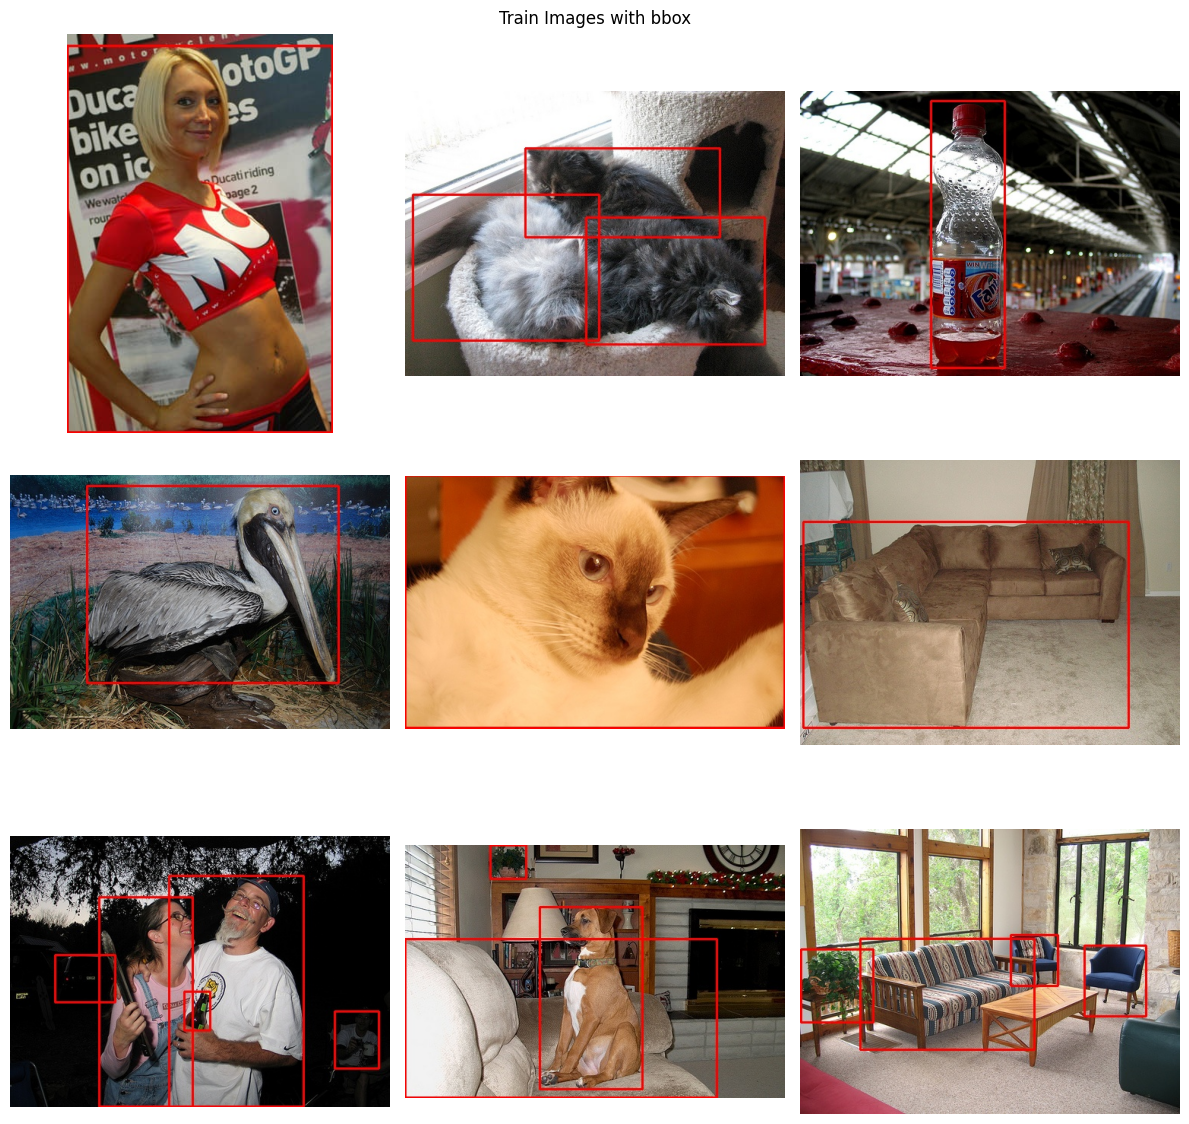

In [14]:
# 3x3のサブプロットを作成
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# 各画像を読み込んで描画
for i, image_path in enumerate(image_list):
    row = i // 3  # 行番号を取得
    col = i % 3  # 列番号を取得
    image = plt.imread(image_path)
    axes[row, col].imshow(image)

# タイトルと軸ラベルを設定
fig.suptitle("Train Images with bbox")
for ax in axes.flat:
    ax.axis('off')  # 軸ラベルと目盛線を非表示

# グラフを表示
plt.tight_layout()  # サブプロット間の余白を調整
plt.show()